In [1]:
import torch
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [62]:
colors = ['#4169e1', '#4191e1', '#800020', '#ff80b8']
color_idx = 0

def gen_plot(v1, v2, show=False):
    global colors, color_idx
    x1, y1 = v1.numpy() if isinstance(v1, torch.Tensor) else v1
    x2, y2 = v2.numpy() if isinstance(v2, torch.Tensor) else v2
    x = np.linspace(-10, 10, 1000) if x2 != x1 else np.ones(1000) * x1
    y = (y2 - y1) / (x2 - x1) * (x - x1) + y1 if x2 != x1 else np.linspace(-10, 10, 1000)
    
    plt.plot(x, y, colors[color_idx])
    color_idx = (color_idx + 1) % 4
    if show:
        plt.show()
        
def all_plot(points):
    global color_idx
    color_idx = 0
    for v1, v2 in points:
        gen_plot(v1, v2)
    plt.ylim(-15, 15)
    plt.show()

In [76]:
v1 = torch.tensor([2, 1]).float()
v2 = torch.tensor([1, 2]).float()

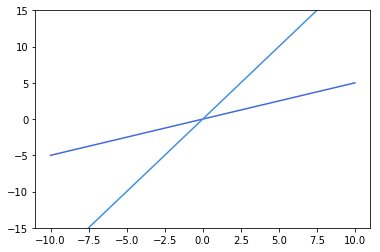

In [77]:
all_plot([([0, 0], v1), ([0, 0], v2)])

In [78]:
A = torch.cat((v1.unsqueeze(0), v2.unsqueeze(0)), 0)
A

tensor([[2., 1.],
        [1., 2.]])

In [79]:
w, v = torch.eig(A, eigenvectors=True)
w = w[:, 0]

In [80]:
print(w)
print(v)

tensor([3., 1.])
tensor([[ 0.7071, -0.7071],
        [ 0.7071,  0.7071]])


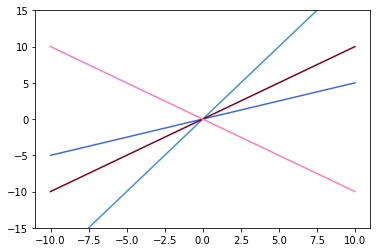

In [81]:
points = []
points.append(([0, 0], v1))
points.append(([0, 0], v2))
points.append(([0, 0], v[:, 0]))
points.append(([0, 0], v[:, 1]))
all_plot(points)

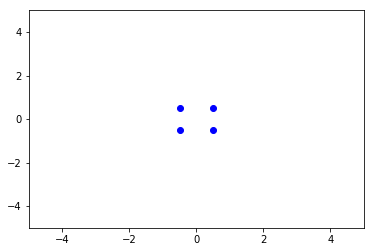

In [105]:
square = [[1, 1],
          [1, 2],
          [2, 2],
          [2, 1],]

square = torch.Tensor(square).float()
square -= square.mean(0)

for p in square:
    plt.plot(*p, 'bo')

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

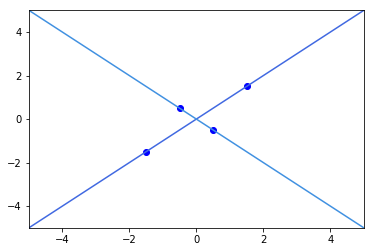

In [106]:
square_ = A.matmul(square.transpose(0, 1)).transpose(0, 1).tolist()
for p in square_:
    plt.plot(*p, 'bo')

gen_plot([0, 0], v[:, 0], show=False)
gen_plot([0, 0], v[:, 1], show=False)

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()